<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/SolEvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



In [355]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
from scipy import optimize

In [356]:
A=5E-15
p=0.102
T0 = 313
Tinfty = 300
p=0.102
k=200
h=20

In [362]:

def fun(U, t, a ):

  dU1dt = a**2*U[0]
  dU0dt = U[1]
  return np.array([dU0dt, dU1dt])

U=np.array([13, -13*alpha])
t=np.linspace(0, 3E-6, 100)
theta = odeint(fun, U, t, args=(alpha, ))
T = theta[:,0] + 300

In [363]:
x=np.linspace(0, 3E-6, 100)
alpha=np.sqrt(h*p/(k*A))
Temp = lambda x:(Tinfty+(T0-Tinfty)*np.exp(-x*alpha))

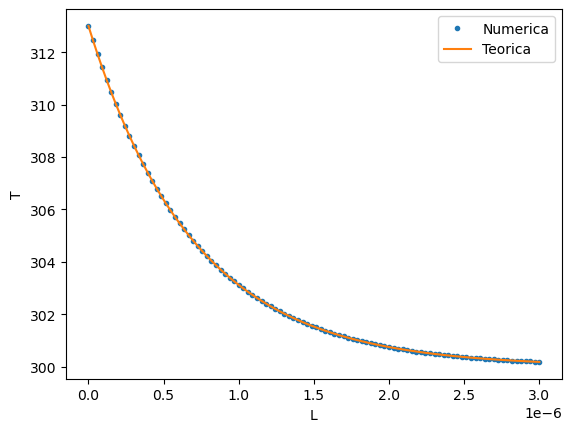

In [381]:
plt.figure()
plt.plot( t, T,"." ,label="Numerica")
plt.plot( t, Temp(x), label="Teorica")
plt.ylabel("T")
plt.xlabel("L")
plt.legend()
plt.show()

# Metodo de Newton


\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}

\begin{equation}
T'(x) = (T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}*-\sqrt{hp/kAc}
\end{equation}




In [452]:
def fun_(x, *params):
    T1, Tinfty, T0, alpha = params
    f=T1-(Tinfty+(T0-Tinfty)*np.exp(-x*alpha))
    #f=x**2-1
    return f

def derivada(x, *params):
    T1, Tinfty, T0, alpha = params
    return alpha*((T0-Tinfty)*np.exp(-x*alpha))

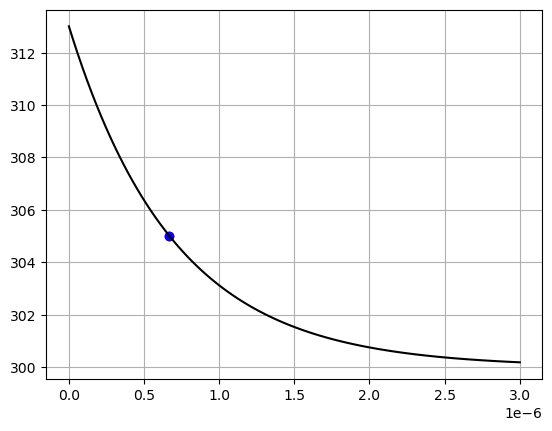

In [453]:
T1 = 305
params=T1, Tinfty, T0, alpha 
Xbisect = optimize.bisect(fun_,0.2E-6, 1E-6, args= params)
Xnewton = optimize.newton(fun_,0.9E-6,fprime=derivada,  args= params)

plt.figure()
plt.plot(Xbisect, 305, "ro")
plt.plot(Xnewton, 305, "bo")
plt.plot(x, Temp(x),"k-")
#plt.xlim(0,5E-6, 1E-6)
#plt.plot(Xnewton, fun(Xnewton, *params), "ro")
#plt.plot(newton, 305,"ro")
plt.grid()